<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Iris 데이터로 모델링합니다.
- Decision Tree 알고리즘으로 모델링합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [7]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [8]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [9]:
# 상위 몇 개 행 확인
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# 기초통계량 확인
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# 범주값 개수 확인
data['Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [12]:
# 상관관계 확인
data.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [13]:
# Target 설정
target = 'Species'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [14]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.

In [15]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# 2단계: 선언하기
model1 = DecisionTreeClassifier(random_state=2022)

In [19]:
# 3단계: 학습하기
model1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [20]:
# 4단계: 예측하기
y_pred1 = model1.predict(x_test)

In [21]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[14  0  0]
 [ 0 16  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [22]:
# 2단계: 선언하기
model2 = DecisionTreeClassifier(max_depth=3, random_state=2022)

# 3단계: 학습하기
model2.fit(x_train, y_train)

# 4단계: 예측하기
y_pred2 = model2.predict(x_test)

# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[14  0  0]
 [ 0 16  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [23]:
# 2단계: 선언하기
model3 = DecisionTreeClassifier(max_depth=5, random_state=2022)

# 3단계: 학습하기
model3.fit(x_train, y_train)

# 4단계: 예측하기
y_pred3 = model3.predict(x_test)

# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[14  0  0]
 [ 0 16  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# 5.기타

- 기타 필요한 내용이 있으면 진횅합니다.

In [29]:
list(y.unique())

['setosa', 'versicolor', 'virginica']

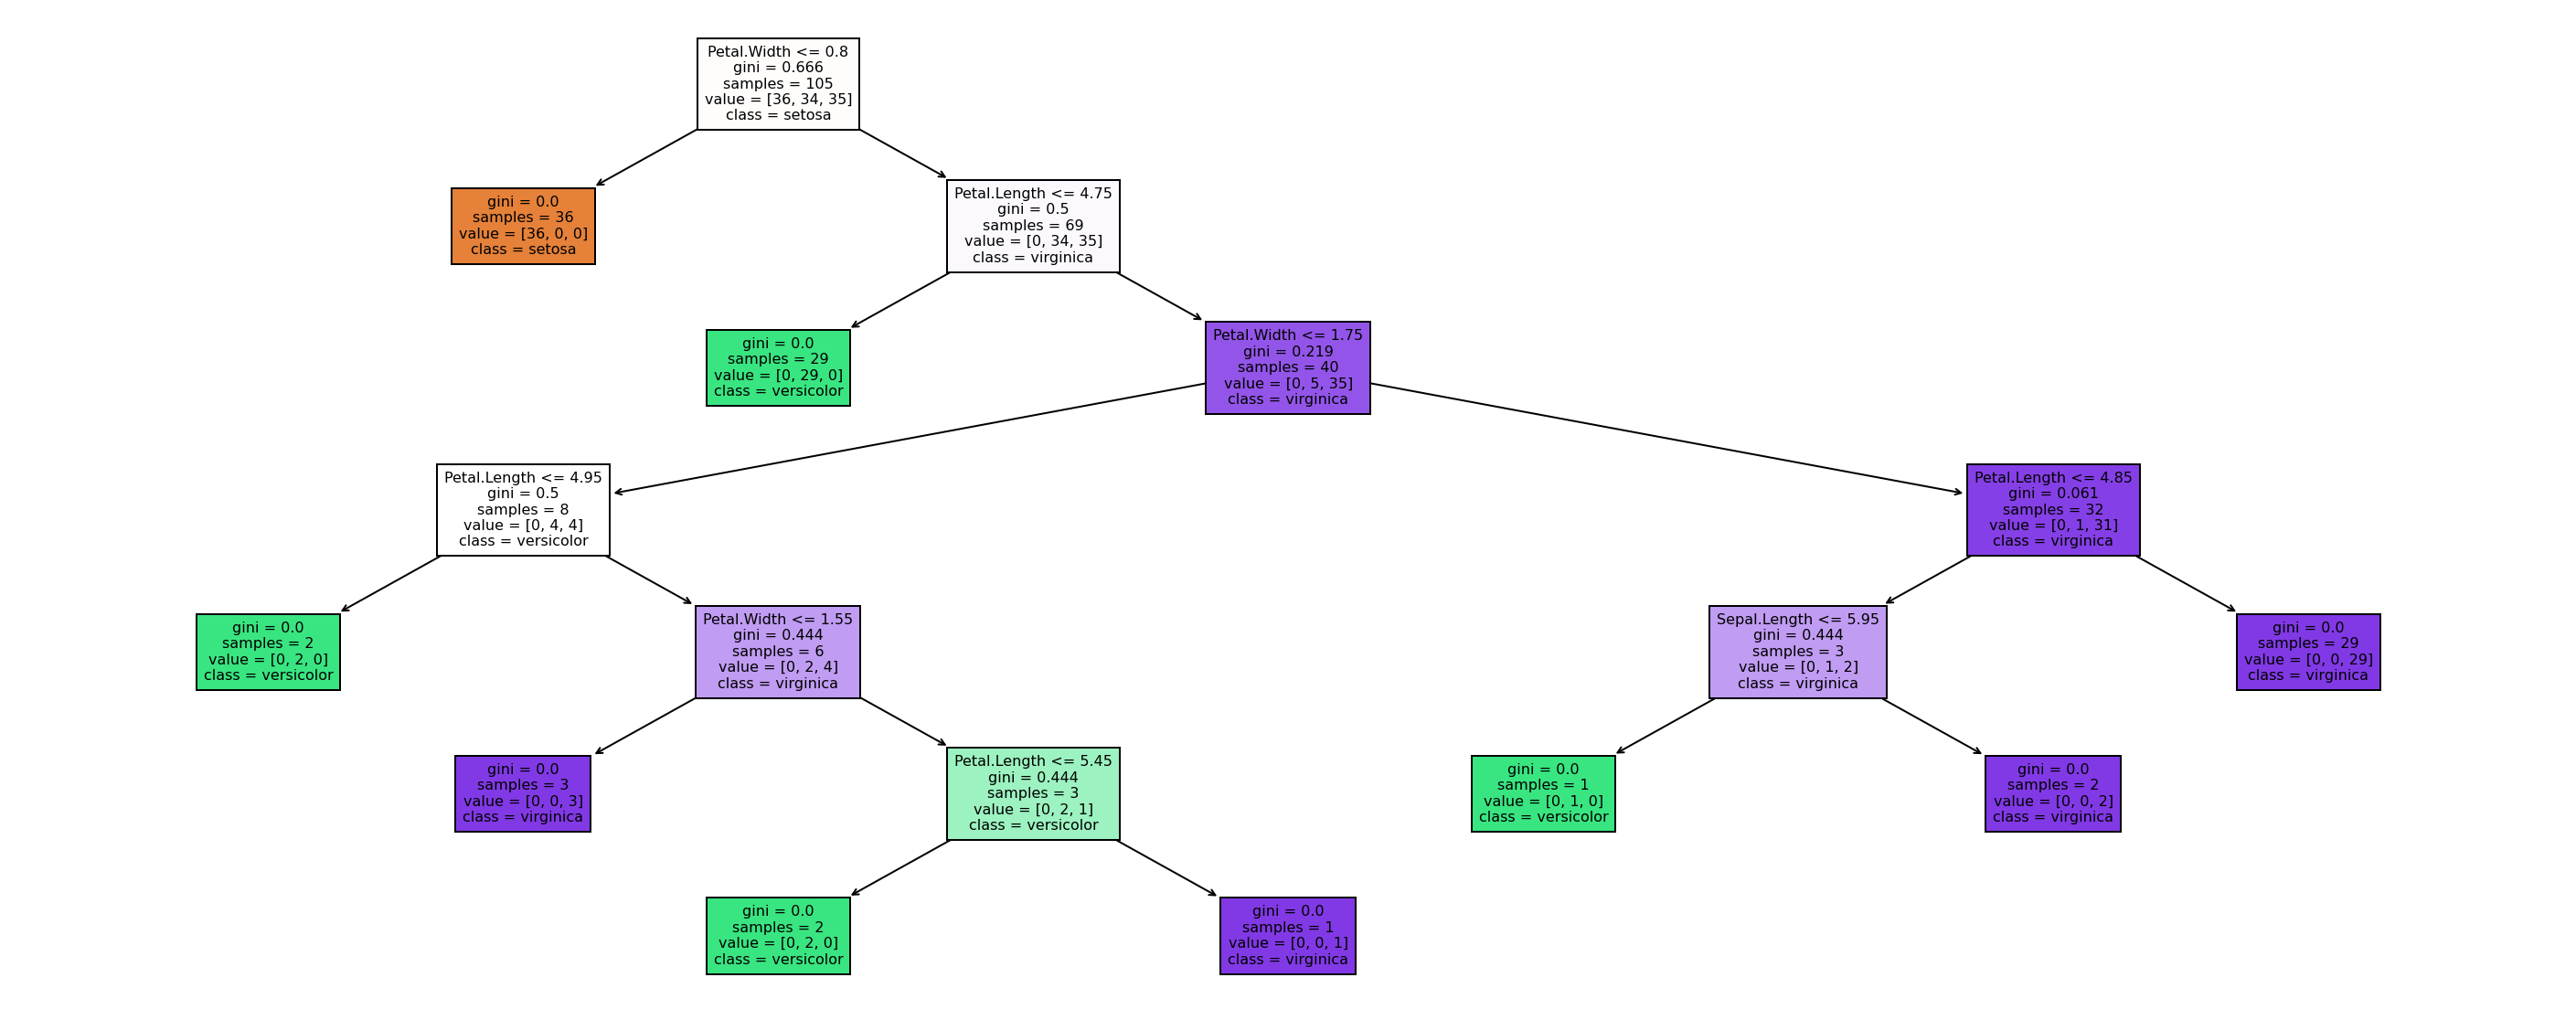

In [32]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(model1,
          filled=True,
          feature_names=list(x),
          class_names=y.unique(),
          fontsize=8)
plt.show()

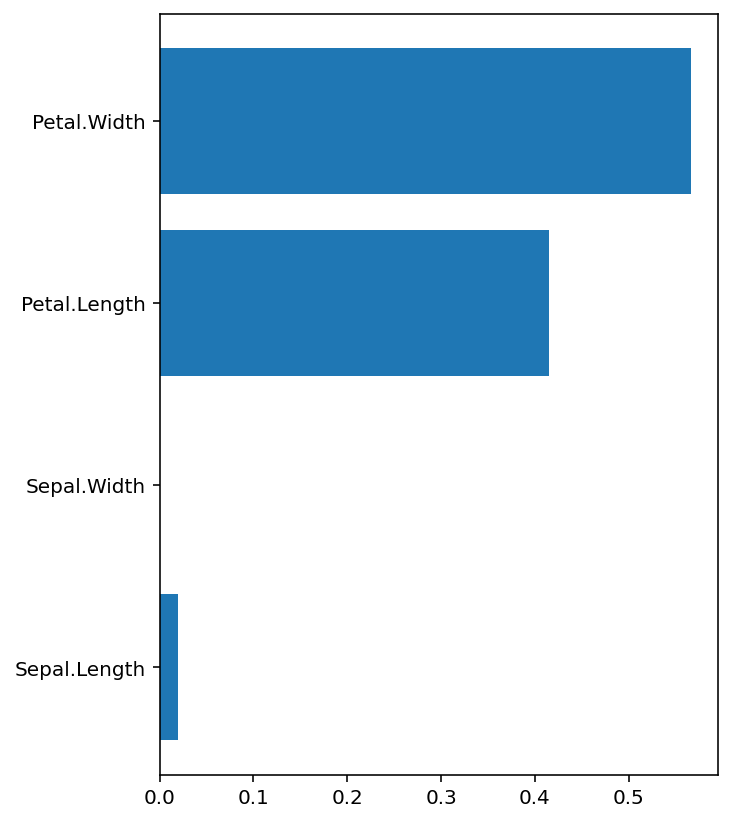

In [35]:
# 변수 중요도 확인
plt.figure(figsize=(5,7))
plt.barh(y=list(x), width=model1.feature_importances_)
plt.show()

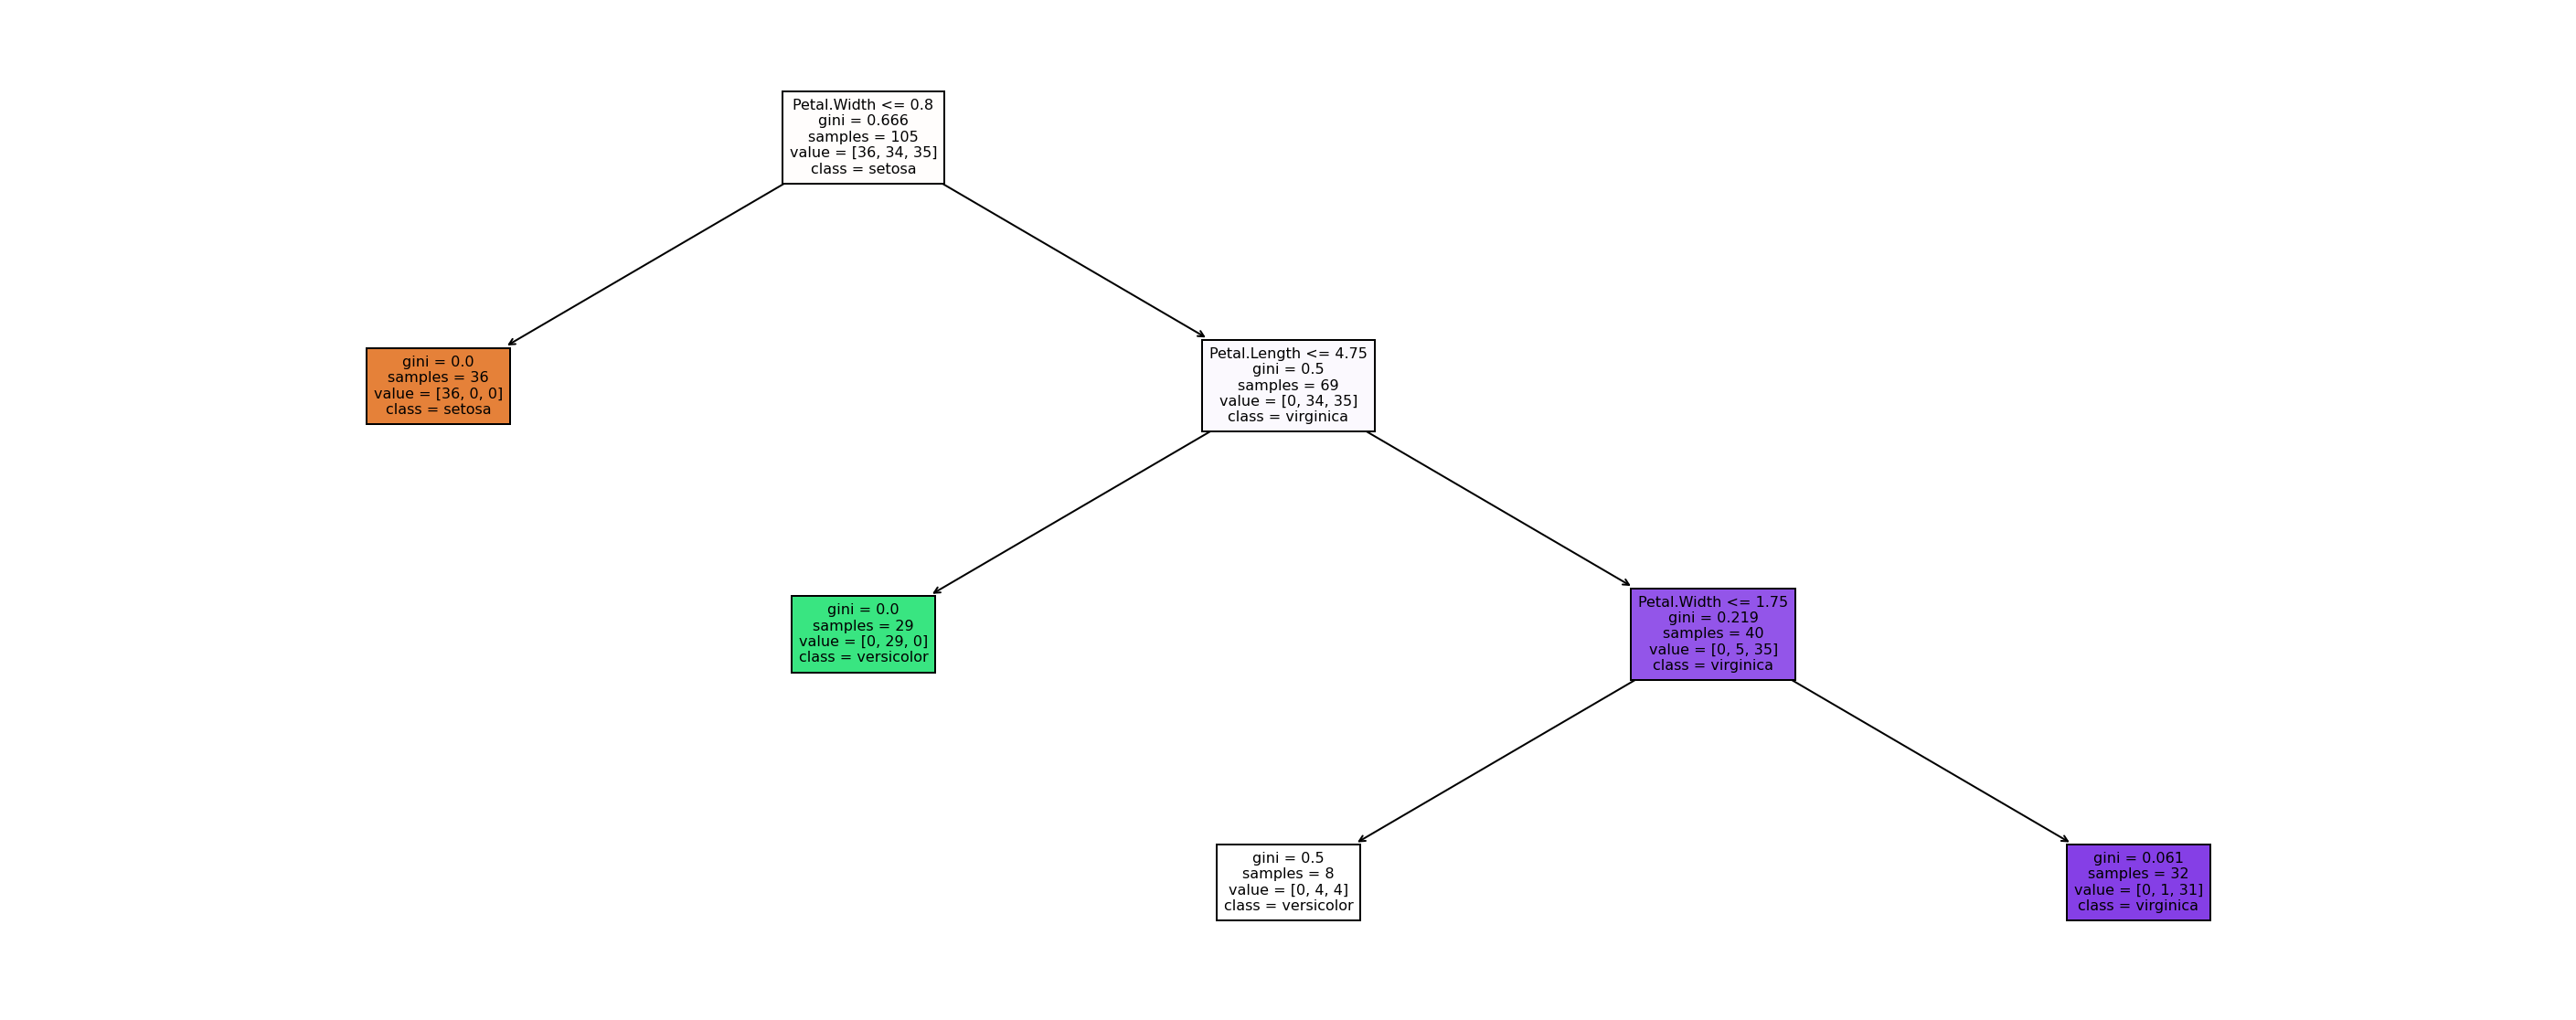

In [33]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(model2,
          filled=True,
          feature_names=list(x),
          class_names=y.unique(),
          fontsize=8)
plt.show()

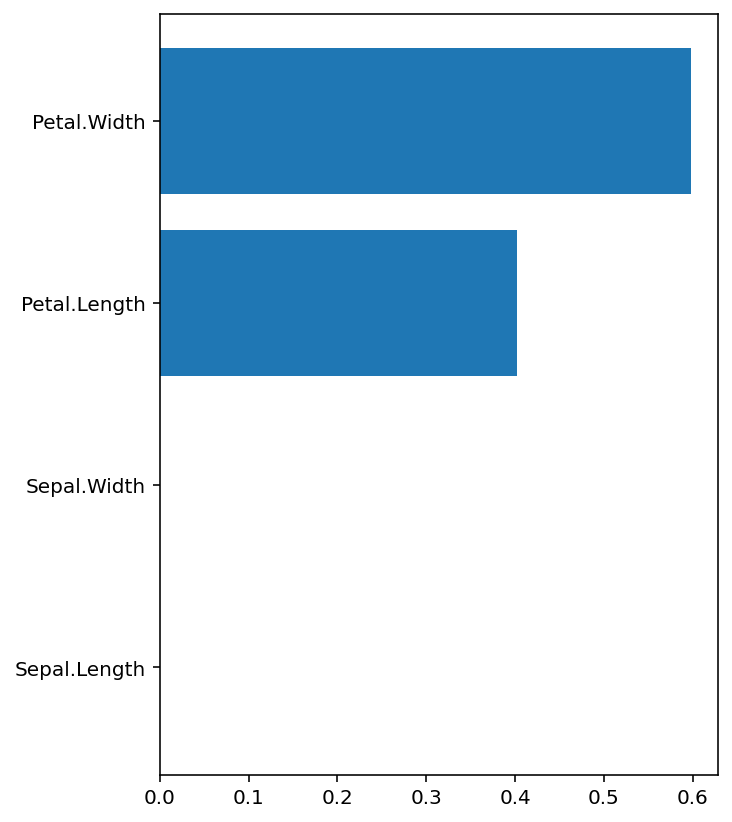

In [36]:
# 변수 중요도 확인
plt.figure(figsize=(5,7))
plt.barh(y=list(x), width=model2.feature_importances_)
plt.show()

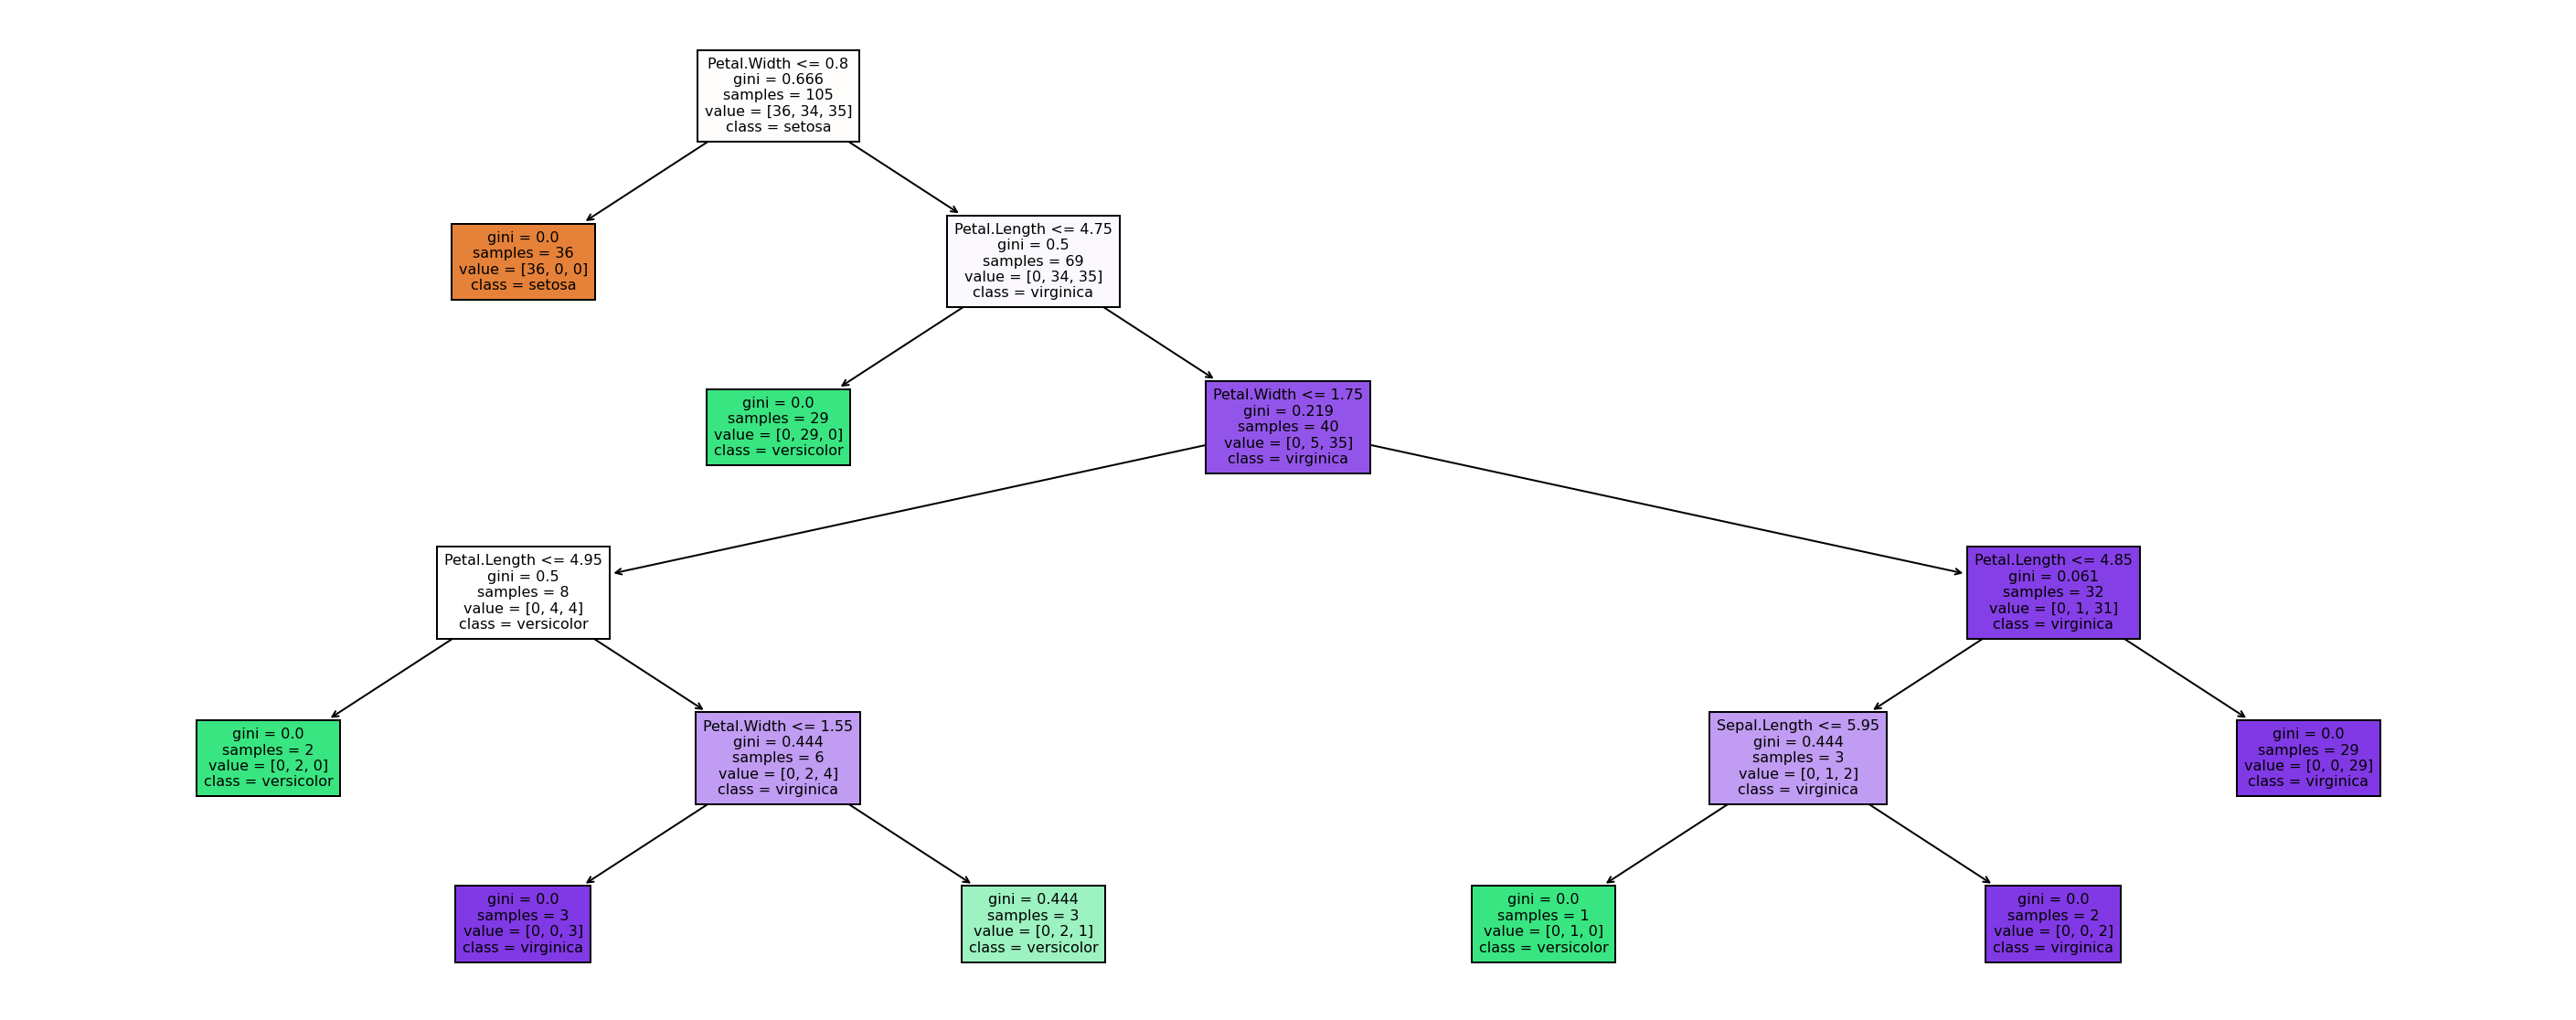

In [34]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(model3,
          filled=True,
          feature_names=list(x),
          class_names=y.unique(),
          fontsize=8)
plt.show()

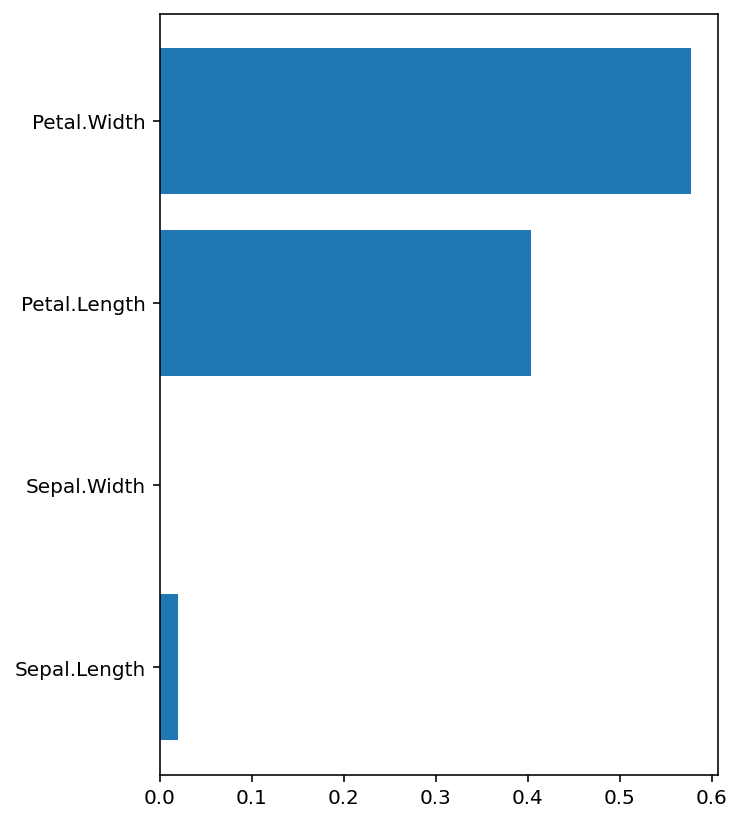

In [37]:
# 변수 중요도 확인
plt.figure(figsize=(5,7))
plt.barh(y=list(x), width=model3.feature_importances_)
plt.show()